### Environment

In [9]:
import sys
import os

# プロジェクトルートをsys.pathに追加
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("PYTHONPATH set to:", project_root)

PYTHONPATH set to: c:\Users\ndhaj\Desktop\TCI


### Load data

In [10]:
from PtychoEP.utils.backend import set_backend
set_backend("numpy")

from PtychoEP.utils.ptycho.core import Ptycho
from PtychoEP.utils.io_utils import load_data_image

ptycho = Ptycho()
obj = load_data_image("cameraman.png")
probe = load_data_image("probe.png")

ptycho.set_object(obj)
ptycho.set_probe(probe)

### Scan position

In [11]:
from PtychoEP.utils.ptycho.scan_utils import generate_spiral_scan_positions

positions = generate_spiral_scan_positions(image_size=512, probe_size=128, num_points=200)
print(f"Generated {len(positions)} scan positions")

Generated 97 scan positions


### forward calculation

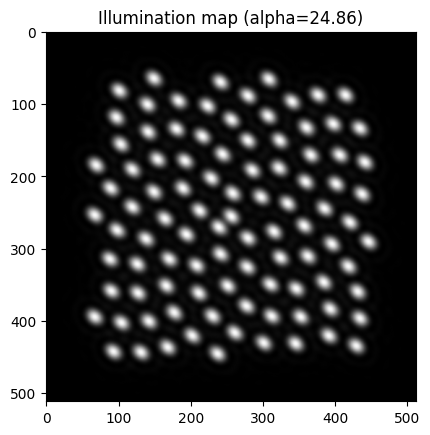

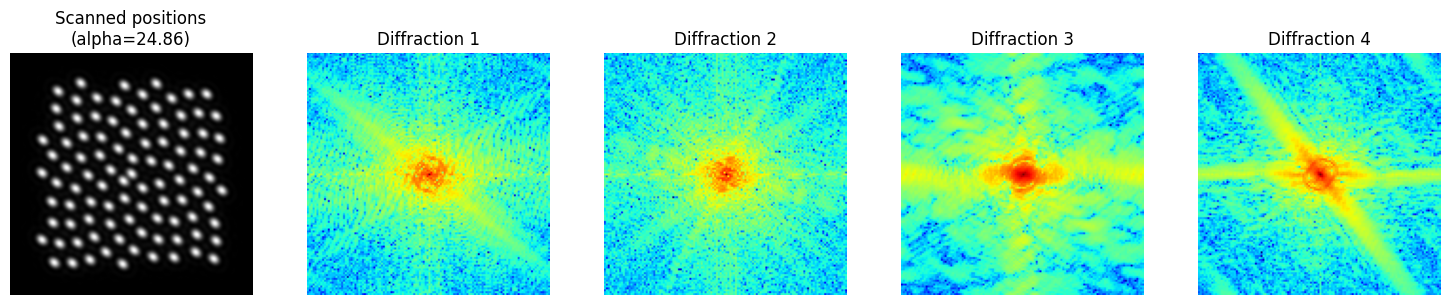

In [13]:
ptycho.forward_and_set_diffraction(positions)

from PtychoEP.utils.ptycho.visualize import compute_illumination, show_scan_and_diffs
scan_img, alpha = compute_illumination(ptycho)

import matplotlib.pyplot as plt
plt.imshow(scan_img, cmap="gray")
plt.title(f"Illumination map (alpha={alpha:.2f})")
plt.show()

fig = show_scan_and_diffs(ptycho, num_patterns=4, log_scale=True)

In [14]:
from PtychoEP.utils.ptycho.noise import GaussianNoise, PoissonNoise

GaussianNoise(var=1e-3) @ ptycho
print("Gaussian noise SNR [dB]:", ptycho.noise_stats["snr_mean_db"])

PoissonNoise(scale=1e4) @ ptycho
print("Poisson noise SNR [dB]:", ptycho.noise_stats["snr_mean_db"])

Gaussian noise SNR [dB]: 22.001699447631836
Poisson noise SNR [dB]: 40.042816162109375
